In [66]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal
import statsmodels.api as sm
import os

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
anime = pd.read_csv('anime_processed.csv',sep=",", index_col=0)
anime.head(3)

,Title,English,Type,Episodes,Status,Start_Aired,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked
0,Shingeki no Kyojin,Attack on Titan,TV,25.0,Finished Airing,2013,Wit Studio,Manga,Action,Gore,Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0
1,Death Note,Death Note,TV,37.0,Finished Airing,2006,Madhouse,Manga,Supernatural,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0
2,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,TV,64.0,Finished Airing,2009,Bones,Manga,Action,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0


## HIPÓTESIS

### Hipótesis 1:
 
Los 100 animes mejor valorados son mayoritariamente Shounen de acción.

<!--
- La puntuación de las películas es inferior a las de las series
- Los animes de aventura tienen más usuarios que puntúan en comparación a comedia, pero la puntuación media es menor
- Los animes basados en manga tienen una puntuación media superior a los animes originales - histograma (pero se puede hacer con estadística)/ boxplot --> -->

In [69]:
# Ordenar el DataFrame en base a la columna "Ranked"
anime_sorted = anime.sort_values(by=["Ranked"])

# Establecer la columna "Ranked" como índice del DataFrame
anime_sorted.set_index("Ranked", inplace=True)

# Reiniciar los índices del DataFrame empezando desde 1
anime_sorted.reset_index(drop=True, inplace=True)
anime_sorted.index = anime_sorted.index + 1
#Creo una variable con los 100 primeros
top100 = anime_sorted.iloc[:100]
top100.head

<bound method NDFrame.head of                                           Title  \
1              Fullmetal Alchemist: Brotherhood   
2    Kaguya-sama wa Kokurasetai: Ultra Romantic   
3                                      Gintama°   
4            Shingeki no Kyojin Season 3 Part 2   
5                                      Gintama'   
..                                          ...   
96                          Bakuman. 2nd Season   
97                         Haikyuu!! To the Top   
98                            Hellsing Ultimate   
99                   Kiseijuu: Sei no Kakuritsu   
100                          Kingdom 2nd Season   

                                      English Type  Episodes           Status  \
1             Fullmetal Alchemist Brotherhood   TV      64.0  Finished Airing   
2    Kaguya-sama Love is War - Ultra Romantic   TV      13.0  Finished Airing   
3                            Gintama Season 4   TV      51.0  Finished Airing   
4             Attack on Titan Sea

<Figure size 2000x2000 with 0 Axes>

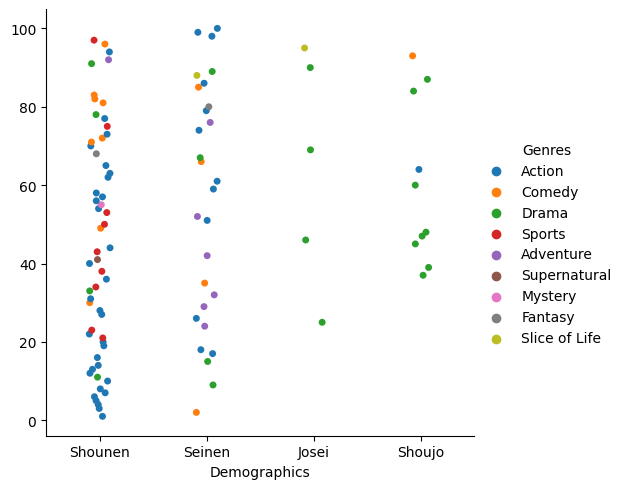

In [70]:
# Lo representamos con un catplot
plt.figure(figsize=(20,20))
sns.catplot(x="Demographics", y=top100.index, hue="Genres", data=top100);

### Conclusión hipótesis 1

La gráfica muestra que la mayoría de los 100 animes mejor valorados se dirigen a público masculino de 12-18 años (Shounen). De la misma manera, se observa una mayoría de animes de acción en la muestra. 

**Se confirma la hipótesis**

### Hipótesis 2:
 
- La puntuación está relacionada de forma inversa con la duración en minutos (a mayor duración, menor puntuación).

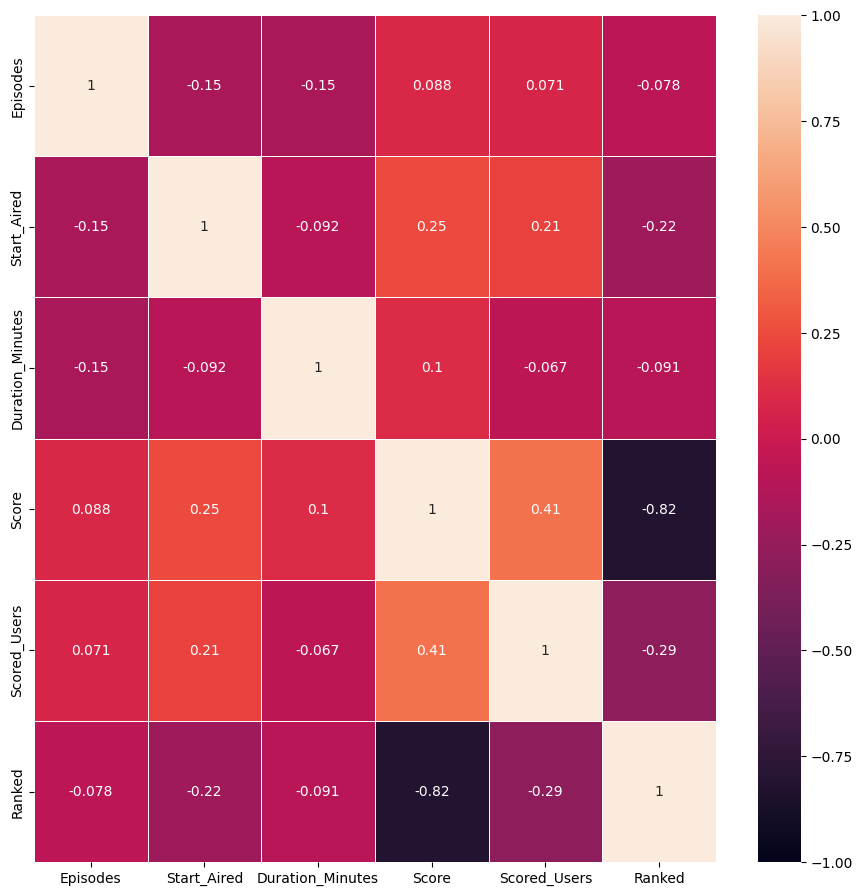

In [71]:
f, ax = plt.subplots(figsize=(11,11))
sns.heatmap(anime.corr(),
            annot=True,
            linewidths=.5,
            ax=ax,
            vmin=-1,
            vmax=1);

Según el heatmap, ambas variables tienen una pequeña correlación positiva. Por lo tanto cuando aumenta una, aumenta levemente la otra.

En principio, **no se confirma la hipótesis**.

Sin embargo, probemos con un test de hipótesis para más fiabilidad.

H0: La puntuación de los animes está inversamente relacionada con su duración.\
H1: La puntuación de los animes está directamente relacionada con su duración.

Nivel de significancia: 0,05

Comprobemos primero si los datos se ajustan a una distribución normal:

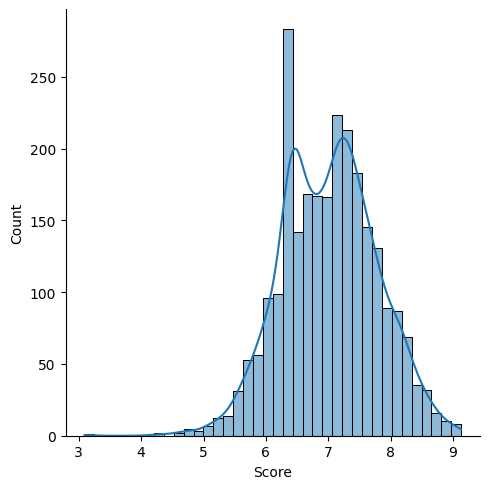

In [72]:
#Debido al tamaño de la muestra, se decide realizar una prueba de Shapiro-Wilk. Primero con Score

x = anime["Score"]
sns.displot(x, kde=True);

In [73]:
stats.shapiro(x)

ShapiroResult(statistic=0.9958979487419128, pvalue=1.8838979940483114e-06)

In [74]:
# Test de normalidad de Shapiro-Wilk
stat, p = stats.shapiro(x)
print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p}')

Shapiro-Wilk:
Statistic : 0.9959, p-value : 1.8838979940483114e-06


In [75]:
def hypotesis_check(p_value):
    alpha=0.05
    # Decisión en función del p-valor y el nivel de significación
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

hypotesis_check(p)

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


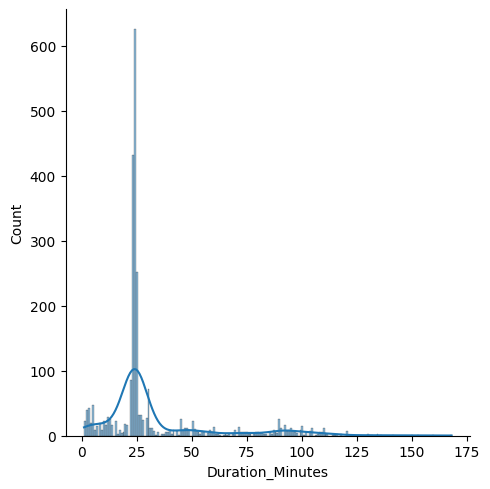

In [76]:
#Ahora lo mismo pero con "Duration_Minutes". Debido a que la muestra es mayor, se decide hacer un test de D'agostino Pearson
x = anime["Duration_Minutes"]
sns.displot(x, kde=True);

In [77]:
# Test de normalidad de D'Agostino-Pearson
stat, p = stats.normaltest(x)
print("\nD'Agostino-Pearson:")
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')


D'Agostino-Pearson:
Statistic: 917.2678, p-value: 0.0000


In [78]:
alpha=0.05

# Decisión en función del p-valor y el nivel de significación
if p < alpha:
    print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
else:
    print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


Se demuestra que ninguno de los datos siguen una distribución normal, por lo que pondremos a prueba nuestra hipótesis con un test no paramétrico.

 Necesitamos comparar dos grupos independientes de datos, por lo que realizaremos la prueba de U de Mann-Whitney.

In [79]:
from scipy.stats import mannwhitneyu

In [80]:
duracion = anime[anime["Duration_Minutes"]!=0]["Duration_Minutes"]
puntuacion = anime[anime["Score"]!=0]["Score"]

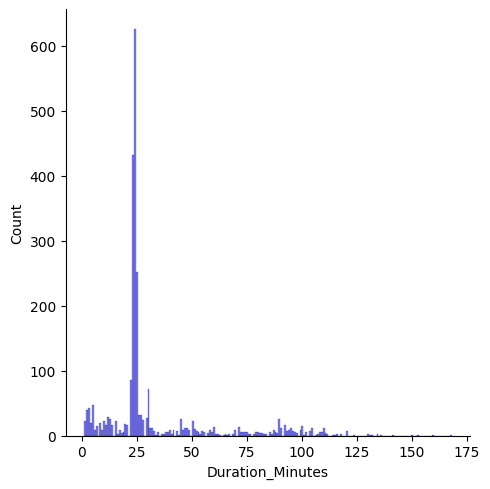

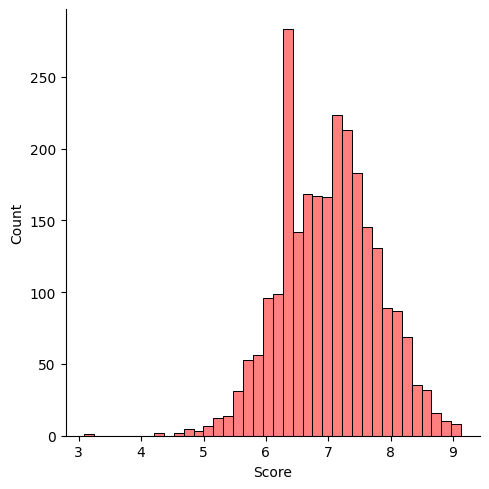

In [81]:
sns.displot(duracion, color='blue', alpha=0.5)
sns.displot(puntuacion, color='red', alpha=0.5)

In [82]:
U, p_valor = mannwhitneyu(duracion, puntuacion)

print("Estadístico U: ", U)
print("P-valor: ", p_valor)

Estadístico U:  6008323.0
P-valor:  0.0


In [83]:
# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula (p-value: {:.4f})".format(p_valor))


Rechazar la hipótesis nula (p-value: 0.0000)


**No se confirma la hipótesis número 2**. La duración de los animes no está relacionada de forma inversa con su puntuación.

### Hipótesis 3:
 
-Los animes cuya emisión empezó antes de los 2000 tienen peor puntuación que los animes que empezaron a emitirse después del 2000.

Desarrollo de la idea: https://www.menzig.es/a/historia-anime-espana-origenes/

En España se ha emitido anime desde la década de los 70 (Heidi, Mazinger Z). Sin embargo, no fue hasta la década de los 90 cuando los animes llegaron a la televisión para quedarse ( Dragon Ball, OLiver y Benji). Partiendo de esta base, ¿los animes que comenzaron después del 2000 están mejor valorados por su mejora artística y su mayor cercanía en el tiempo o, por el contrario, los animes anteriores al 2000 están mejor valorados debido a la nostalgia que despiertan?

In [85]:
#Función que convierte años en décadas
def year_to_decade(years):
    decade = (years//10) * 10
    decade = f'{decade}s'
    return decade

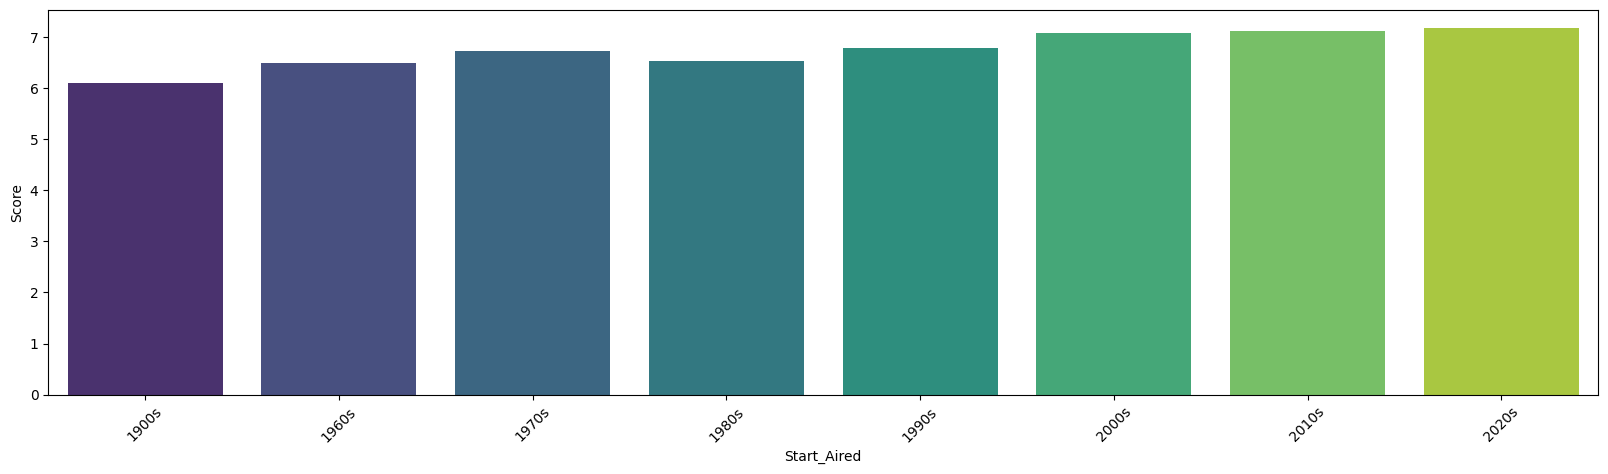

In [86]:
# Convertir años a décadas
anime["Start_Aired"] = anime["Start_Aired"].apply(year_to_decade)

# Agrupar los datos por década y calcular la media de la puntuación
scores_by_decade = anime.groupby("Start_Aired")["Score"].mean().reset_index()

# Ordenar los datos por década
scores_by_decade = scores_by_decade.sort_values("Start_Aired")

# Visualizar los datos
plt.figure(figsize=(20,5))
sns.barplot(x=scores_by_decade["Start_Aired"],
                y=scores_by_decade["Score"], palette="viridis");
plt.xticks(rotation=45)
# plt.xlabel("Década")
# plt.ylabel("Puntuación media")
# plt.title("Puntuación media de los animes por década")
plt.show()


### Conclusión hipótesis 3

La gráfica muestra que los animes que se empezaron a emitir después del 2000, tiene una puntuación ligeramente superior. Sin embargo, la diferencia con épocas anteriores no es suficientemente significativa como para confirmar la hipótesis.

**No se confirma la hipótesis**

### Hipótesis 4:
 
- Los animes de género comedia tienen una puntuación media superior que el resto de los géneros.

In [127]:
#Creamos una variable con la media de la puntuación por géneros.
genres_mean = anime.groupby("Genres")["Score"].mean()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

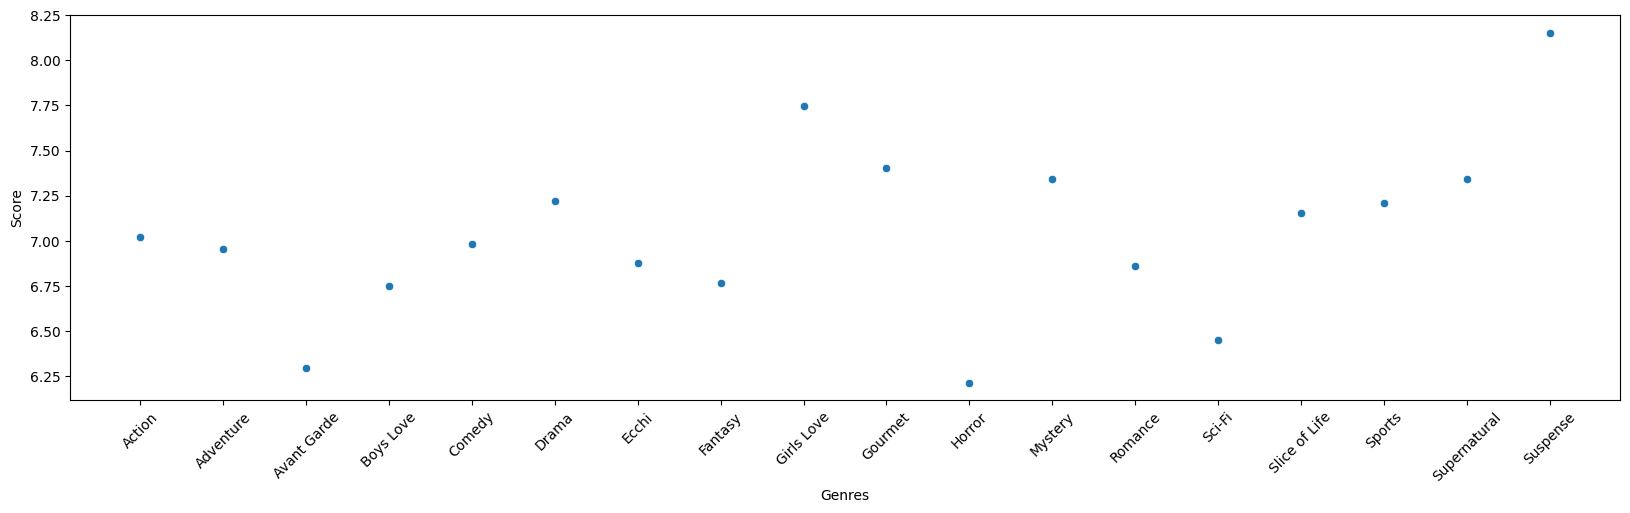

In [129]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=genres_mean)
plt.xticks(rotation=45)

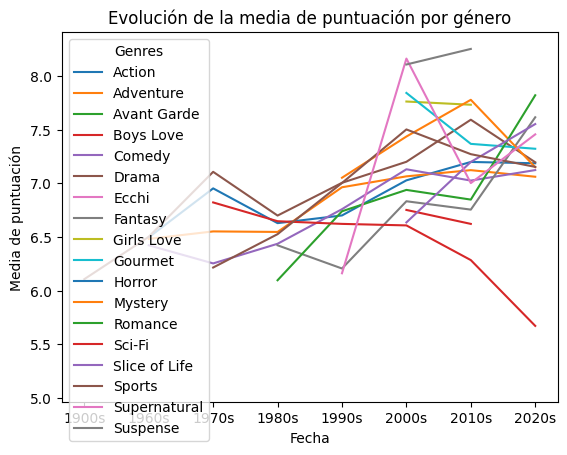

In [114]:
# Suponiendo que ya has calculado la media por género y la has guardado en la variable genres_mean, y que tienes una columna 'Fecha'
genres_mean = anime.groupby(['Genres', 'Start_Aired'])['Score'].mean().unstack('Genres')
genres_mean.plot.line()
plt.xlabel("Fecha")
plt.ylabel("Media de puntuación")
plt.title("Evolución de la media de puntuación por género")
plt.show()


### Conclusión hipótesis 4



**XX confirma la hipótesis**